# Capstone Project : Week 2

![](https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif)

<h1 align=center><font size = 5>Covid 19 case study in New York City</font></h1>

**Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.The new york city has highest number of Covid 19 pandemic as per city consideration **
* [Source](https://www.who.int/news-room/q-a-detail/q-a-coronaviruses)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

### Import necessary Libraries

In [2]:

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [3]:
CLIENT_ID = 'HUUNKGQOTOFMI2G4AWIYYIDAPWCLE15AEXOPNN2ZM3RE4BCB' # your Foursquare ID
CLIENT_SECRET = 'OWS5CWXLIMKN1MOTEOI3YFUEH5PNCJ3LJ5XZ1DJTBWO0OIME' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HUUNKGQOTOFMI2G4AWIYYIDAPWCLE15AEXOPNN2ZM3RE4BCB
CLIENT_SECRET:OWS5CWXLIMKN1MOTEOI3YFUEH5PNCJ3LJ5XZ1DJTBWO0OIME


#### Let's again assume that you are at the NewYork-Presbyterian / Weill Cornell Medical Center‎. So let's start by converting the hospital address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [4]:
address = "525 East 68th Street New York, NY"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.764702099999994 -73.9540033012178


<a id="item1"></a>

## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

#### Now, let's assume that it is lunch time, and you are craving Italian food. So, let's define a query to search for Italian food that is within 500 metres from the Conrad Hotel. 

In [5]:
search_query = 'Covid19 hospital '
radius = 10000
print(search_query + ' .... OK!')

Covid19 hospital  .... OK!


#### Define the corresponding URL

In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=HUUNKGQOTOFMI2G4AWIYYIDAPWCLE15AEXOPNN2ZM3RE4BCB&client_secret=OWS5CWXLIMKN1MOTEOI3YFUEH5PNCJ3LJ5XZ1DJTBWO0OIME&ll=40.764702099999994,-73.9540033012178&v=20180604&query=Covid19 hospital &radius=10000&limit=30'

#### Send the GET Request and examine the results

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 500,
  'errorType': 'server_error',
  'errorDetail': 'Foursquare servers are experiencing problems. Please retry and check status.foursquare.com for updates.'},
 'response': {}}

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

KeyError: 'venues'

#### Define information of interest and filter dataframe

In [47]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,New York Presbyterian Hospital Weill Cornell M...,Hospital,525 E 68th St Fl 6,US,New York,United States,at York Ave,11,"[525 E 68th St Fl 6 (at York Ave), New York, N...","[{'label': 'display', 'lat': 40.76480204304722...",40.764802,-73.954055,NaN,10065,NY,4a5bece4f964a52000bc1fe3
1,Hospital for Special Surgery -- Caspary Resear...,Hospital,541 E 71st St,US,New York,United States,NaN,38,"[541 E 71st St, New York, NY 10021, United Sta...","[{'label': 'display', 'lat': 40.76471952550508...",40.764720,-73.953545,NaN,10021,NY,4e8f1e655503c2855643e1d3
2,NewYork-Presbyterian Hospital - Emergency Depa...,Emergency Room,525 E 68th St,US,New York,United States,at York Ave.,46,"[525 E 68th St (at York Ave.), New York, NY 10...","[{'label': 'display', 'lat': 40.7643316, 'lng'...",40.764332,-73.954256,NaN,10065,NY,4f3a25dee4b0e3d3dacc3520
3,Starr Pavilion New York Hospital urology,Medical Center,NaN,US,New York,United States,NaN,48,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.76491010948472...",40.764910,-73.953499,NaN,NaN,NY,52d3f265498e81554b65d23d
4,Walgreens at New York Presbyterian Hospital,Pharmacy,525 E 68th St Ste F01-170,US,New York,United States,NaN,56,"[525 E 68th St Ste F01-170, New York, NY 10065...","[{'label': 'display', 'lat': 40.76449448294941...",40.764494,-73.954621,NaN,10065,NY,58f43641aa6c954a9d899100
5,New York Presbyterian Hospital,Hospital,505 E 70th St,US,New York,United States,NaN,72,"[505 E 70th St, New York, NY 10021, United Sta...","[{'label': 'display', 'lat': 40.76528196862197...",40.765282,-73.954394,NaN,10021,NY,51682370e4b081b085e6b7b1
6,Hospital for Special Surgery,Hospital,535 E 70th St,US,New York,United States,at York Ave,132,"[535 E 70th St (at York Ave), New York, NY 100...",NaN,40.765348,-73.952689,NaN,10021,NY,4a78348ff964a52046e51fe3
7,Hospital for Special Surgery,Hospital,535 E 70th St,US,New York,United States,NaN,151,"[535 E 70th St, New York, NY 10021, United Sta...","[{'label': 'display', 'lat': 40.76563543723554...",40.765635,-73.952692,NaN,10021,NY,532cb61311d2410bfca3443c
8,Hospital for Special Surgery Interventional Ra...,Hospital,535 E 70th St,US,New York,United States,NaN,116,"[535 E 70th St, New York, NY 10021, United Sta...","[{'label': 'display', 'lat': 40.76502015533486...",40.765020,-73.952689,NaN,10021,NY,52814302498edb6628dacc7f
9,New York Presbyterian Hospital Weill Cornell M...,Medical Center,1305 York Ave,US,New York,United States,70th St,120,"[1305 York Ave (70th St), New York, NY 10021, ...","[{'label': 'display', 'lat': 40.765432, 'lng':...",40.765432,-73.955057,NaN,10021,NY,5dc4801e19e91a000874ce4d


#### Let's visualize the Italian restaurants that are nearby

In [48]:
dataframe_filtered.name

0     New York Presbyterian Hospital Weill Cornell M...
1     Hospital for Special Surgery -- Caspary Resear...
2     NewYork-Presbyterian Hospital - Emergency Depa...
3              Starr Pavilion New York Hospital urology
4           Walgreens at New York Presbyterian Hospital
5                        New York Presbyterian Hospital
6                          Hospital for Special Surgery
7                          Hospital for Special Surgery
8     Hospital for Special Surgery Interventional Ra...
9     New York Presbyterian Hospital Weill Cornell M...
10           NewYork-Presbyterian Hospital Spine Center
11    Hospital for Special Surgery Sports Performanc...
12    NewYork-Presbyterian Hospital/William Randolph...
13                Hospital for Special Surgery Pharmacy
14                          MSKCC Surgical Day Hospital
15    Hospital for Special Surgery - East River Prof...
16                                  Lenox Hill Hospital
17      NewYork-Presbyterian Hospital- NeuroScie

In [60]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map 

venues_map

<a id="item2"></a>

# Corona Virus in the world

In [10]:
cases = pd.read_csv("covid_19_data.csv")
import plotly.offline as py
import plotly.express as px


py.init_notebook_mode(connected=True)

grp = cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
grp = grp.reset_index()
grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp['Date'] = grp['Date'].dt.strftime('%m/%d/%Y')
grp['Active'] = grp['Confirmed'] - grp['Recovered'] - grp['Deaths']
grp['Country'] =  grp['Country/Region']

fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths,grp.Active],projection="natural earth",
                     animation_frame="Date",width=1000, height=700,
                     color_continuous_scale='Reds',
                     range_color=[1000,50000],

                     title='World Map of Coronavirus')

fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)


### Read the csv file that contain covid19 cases are grouped according to their ages

In [14]:
df=pd.read_csv(r"by-age.csv",index_col=0)
df.head()

,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE
AGE_GROUP,,,
0-17 years,205.86,15.81,0.29
18-44 years,1722.48,169.01,14.30
45-64 years,2827.90,688.51,128.84
65-74 years,2824.85,1321.67,416.24
75 and older years,3274.19,2049.82,1055.26


## Visualizing Data using Matplotlib

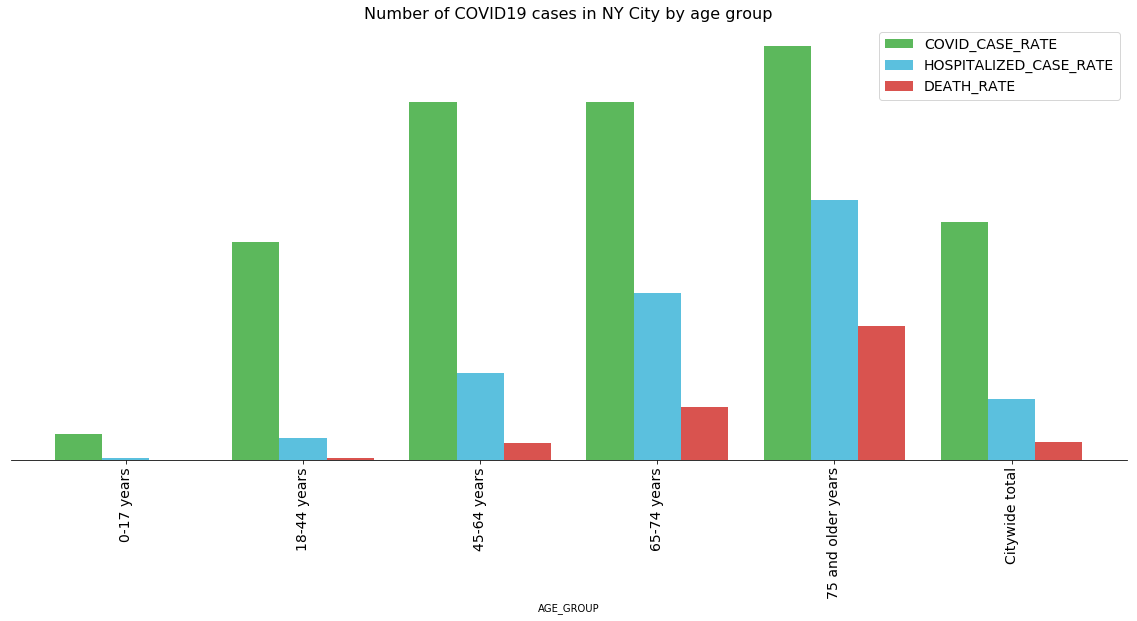

In [15]:
ax1 = df.plot(kind = 'bar',
                figsize = (20,8),
                width = 0.8,
                color = ('#5cb85c', '#5bc0de', '#d9534f'),
                fontsize = 14)
ax1.set_title("Number of COVID19 cases in NY City by age group", 
             fontsize = 16)
ax1.legend(fontsize = 14)

#ax1.set_facecolor((1.0, 1.0, 1.0))

y_axis = ax1.axes.get_yaxis()
y_axis.set_visible(False)
ax1.set_ylabel('Count per 100,000',fontsize=20)

ax1.spines['top'].set_visible(False)

ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_yticks([])
plt.show()

# Following data show Covid 19 cases according to sex group

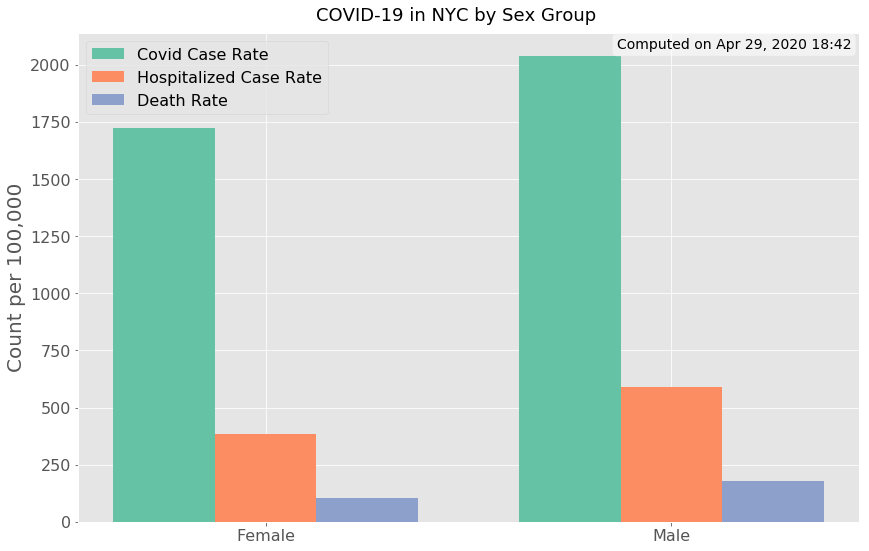

In [16]:

import requests,datetime,os

plt.style.use('ggplot') # ggplot formatting

# COVID-19 Datasets
github_url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/' # nyc data repository
data_file_urls = ['boro.csv','by-age.csv','by-sex.csv','case-hosp-death.csv',
                  'summary.csv','tests-by-zcta.csv'] # the .csv files to read where data exists

# read borough data file first and plot
r = requests.get(github_url+data_file_urls[2])
txt = r.content.decode('utf-8-sig').split('\r\n') # this vector contains all the data
header = txt[0].split(',')

fig,ax = plt.subplots(figsize=(14,9))
spacer = -0.25
cii = 0
for plot_indx in range(1,len(header)):
    data_to_plot,x_range = [],[]
    for jj in range(1,len(txt)-1):
        x_range.append(txt[jj].split(',')[0])
        data_to_plot.append(float(txt[jj].split(',')[plot_indx]))
    x_plot = np.arange(0,len(x_range))+spacer
    hist = ax.bar(x_plot,data_to_plot,label=header[plot_indx].replace('_',' ').title(),width=0.25,color=plt.cm.Set2(cii))
    spacer+=0.25
    cii+=1
    
    
ax.set_ylabel('Count per 100,000',fontsize=20)
ax.set_xticks(np.arange(0,len(x_range)))
ax.set_xticklabels(x_range)
ax.legend(fontsize=16)
ax.tick_params('both',labelsize=16)
fig.suptitle('COVID-19 in NYC by '+header[0].replace('_',' ').title(),y=0.92,fontsize=18)
# textbox showing the date the data was processed
txtbox = ax.text(0.0, 0.975, 'Computed on '+datetime.datetime.now().strftime('%b %d, %Y %H:%M'), transform=ax.transAxes, fontsize=14,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='w',alpha=0.5)) 
txtbox.set_x(1.04-(txtbox.figure.bbox.bounds[2]-(txtbox.clipbox.bounds[2]-txtbox.clipbox.bounds[0]))/txtbox.figure.bbox.bounds[2])
fig.savefig(header[0]+'_in_nyc.png',dpi=300,facecolor='#FCFCFC',bbox_inches = 'tight')
plt.show()


## Time series analysis of Covid 19 Cases 

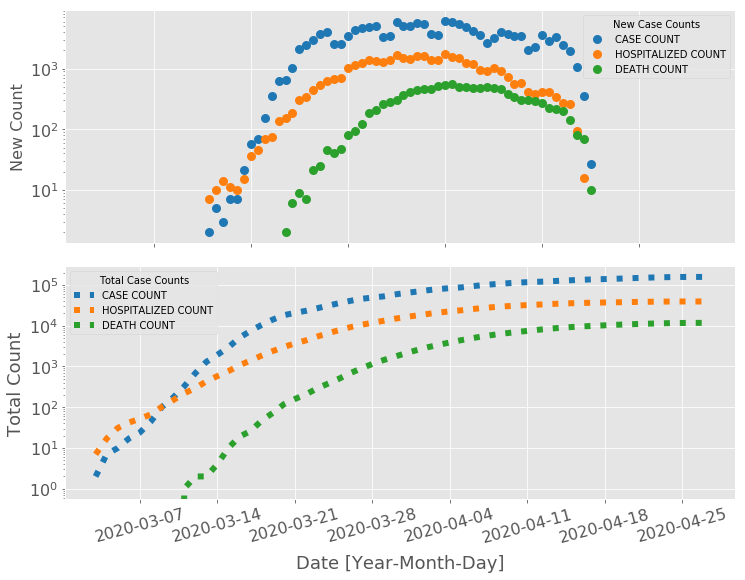

In [17]:
import requests,datetime,os

plt.style.use('ggplot') # ggplot formatting

# COVID-19 Datasets
github_url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/' # nyc data repository
data_file_urls = ['boro.csv','by-age.csv','by-sex.csv','case-hosp-death.csv',
                  'summary.csv','tests-by-zcta.csv'] # the .csv files to read where data exists

# read borough data file first and plot
r = requests.get(github_url+data_file_urls[3])
txt = r.content.decode('utf-8-sig').split('\r\n') # this vector contains all the data

header = txt[0].split(',')
dates = [datetime.datetime.strptime(ii.split(',')[0],'%m/%d/%y') for ii in txt[1:]]

fig,axs = plt.subplots(2,1,figsize=(12,9))
cii = 0
for jj in range(1,len(txt[0].split(','))):
    vals = []
    for ii in range(0,len(txt[1:])):
        val = (txt[1:])[ii].split(',')[jj]
        if val=='':
            val = np.nan
        else:
            val = float(val)
        vals.append(val)
        
    axs[0].scatter(dates,vals,label=txt[0].split(',')[jj].replace('_',' '),color=plt.cm.tab10(cii),linewidth=3.0)    
    axs[1].plot(dates,np.nancumsum(vals),label=(txt[0].split(',')[jj]).replace('_',' ').replace('NEW','TOTAL'),
                                                                linewidth=6.0,color=plt.cm.tab10(cii),linestyle=':')
    cii+=1
    
axs[0].legend(title='New Case Counts')
axs[0].tick_params(axis='x', rotation=15)
axs[0].set_ylabel('New Count',fontsize=16)
axs[0].set_yscale('log')
axs[0].tick_params('both',labelsize=16)
axs[0].set_xticklabels([])
axs[1].legend(title='Total Case Counts')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=15)
axs[1].set_xlabel('Date [Year-Month-Day]',fontsize=18,labelpad=10)
axs[1].set_ylabel('Total Count',fontsize=18)
axs[1].tick_params('both',labelsize=16)
fig.subplots_adjust(hspace=0.1)
fig.savefig(header[0]+'_in_NYC_COVID19.png',dpi=300,facecolor='#FCFCFC')
plt.show()


<a id="item4"></a>

<a id="item5"></a>

Now, depending on when you run the above code, you might get different venues since the venues with the highest foot traffic are fetched live. 